- 앙상블(Ensemble)
  - 여러개의 모델(또는 약한 학습기)을 결합해서 더 좋은 성능을 내는 모델
  - 여러개의 약한 모델이 서로의 약점을 보안해서 단일 모델보다 더 강력한 결과를 내는 것이 목표

- 대표적인 앙상블 기법
  - 베깅(Bagging)
    - 각 모델이 독립적으로 학습, 최종결과는 평균(회귀) 또는 투표(분류)
    - 랜덤포레스트
  - 부스팅(Boosting)
    - 모델을 순차적으로 학습시켜 이전 모델의 오류를 보완
    - 이전 모델이 틀린 데이터에 가중치를 부여하여 학습을 집중
    - AdaBoost, Gradient Boosting Machine(GBM), LightGBM, CatBoost
  - 스테킹

# 랜덤포레스

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report  #  f1-score, 밀집도, 정밀도

## 데이터 가져오기

In [19]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
iris = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2,random_state=42)

In [29]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

## 램덤포레스트 모델 가져오기 및 학습

In [25]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

## 예측 및 평가

In [26]:
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 타 모델과 비교
  - 로지스틱회귀(분류모델임)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 부스팅(XGBoost)

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

## 학습 및 예측 평가


In [32]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 고객 이탈 예측
  - 고객의 이탈 여부를 예측하여 마케팅 전략을 세우는 프로젝트

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.66M/6.66M [00:00<00:00, 48.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1


In [35]:
from glob import glob
glob(path+"/*.*")

['/root/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1/customer_churn_dataset-testing-master.csv',
 '/root/.cache/kagglehub/datasets/muhammadshahidazeem/customer-churn-dataset/versions/1/customer_churn_dataset-training-master.csv']

In [39]:
import pandas as pd
df_train = pd.read_csv(path+"/customer_churn_dataset-training-master.csv")
df_test = pd.read_csv(path+"/customer_churn_dataset-testing-master.csv")

In [41]:
df_train.shape, df_test.shape, 440833 + 64374

((440833, 12), (64374, 12), 505207)

In [42]:
df_train.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

이 테스트 파일은 50,5207개의 고객 기록으로 구성되어 있으며, 훈련된 이탈 예측 모델의 성능과 일반화 능력을 평가하기 위한 별도의 데이터셋으로 사용됩니다. 테스트 파일의 각 기록은 하나의 고객에 해당하며, 연령, 성별, 계약 기간, 사용 빈도, 지원 호출, 결제 지연, 구독 유형, 계약 기간, 총 지출, 마지막 상호작용 등 훈련 파일과 동일한 특성들을 포함하고 있습니다. 그러나 이탈 레이블은 테스트 파일에 포함되지 않으며, 이는 이탈 예측 모델의 정확도와 효율성을 평가하는 데 사용됩니다. 테스트 파일은 기업이 훈련된 모델의 예측력을 보지 못한 데이터에서 평가하고, 모델이 새로운 고객에 대해 얼마나 잘 일반화되는지에 대한 통찰을 얻을 수 있게 해줍니다. 테스트 파일에서 모델의 성능을 분석함으로써, 기업은 이탈 예측 전략의 효과를 평가하고 고객 유지 노력을 최적화하기 위한 정보에 기반한 결정을 내릴 수 있습니다.

# 모델이 학습가능하도록 데이터 정제

## 도메인 지식을 활용해서 불필요한 컬럼을 제거

In [43]:
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [45]:
# CustomerID remove
df_train.drop("CustomerID",axis=1,inplace=True)
df_test.drop("CustomerID",axis=1,inplace=True)

## 결측치, 이상치 처리

In [46]:
# 결측치 여부 확인
df_train.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [54]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

<Axes: >

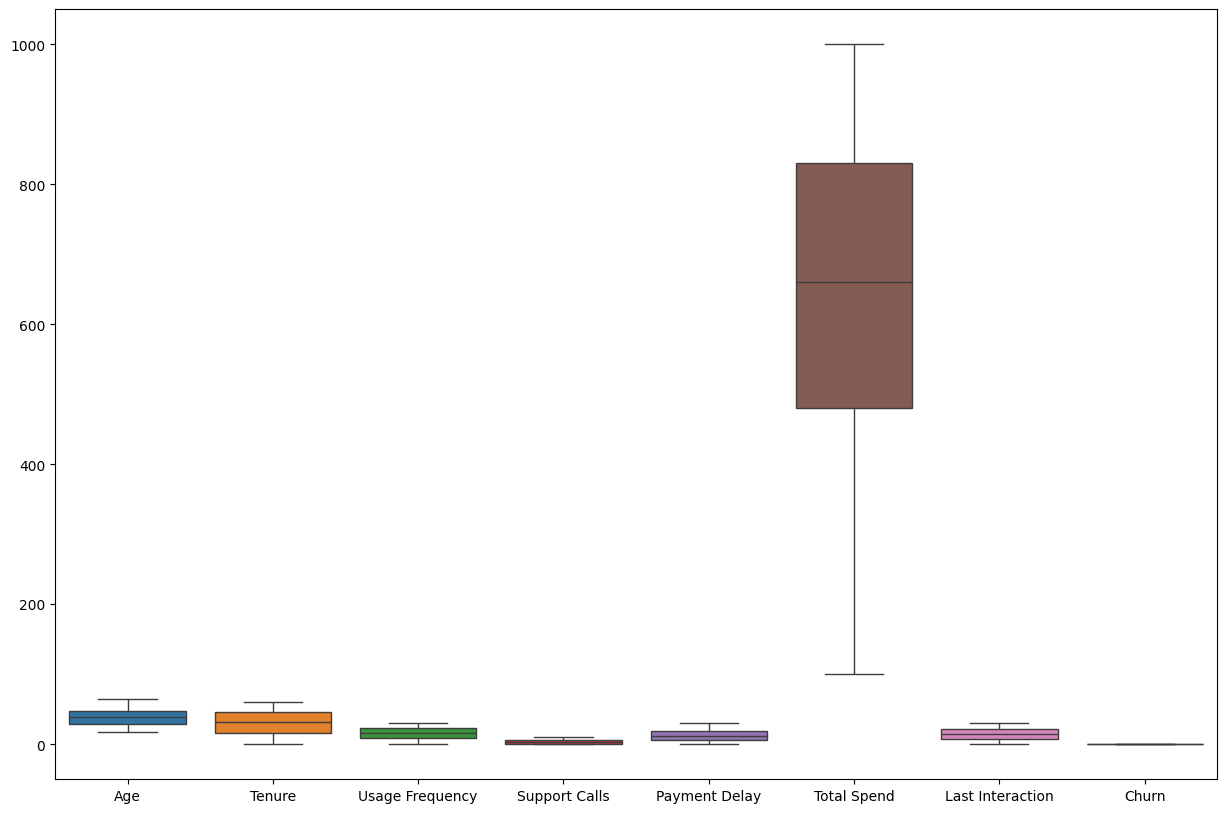

In [50]:
# boxplot을 이용해서 모든 컬럼의 이상치 탐색
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(df_train)

<Axes: >

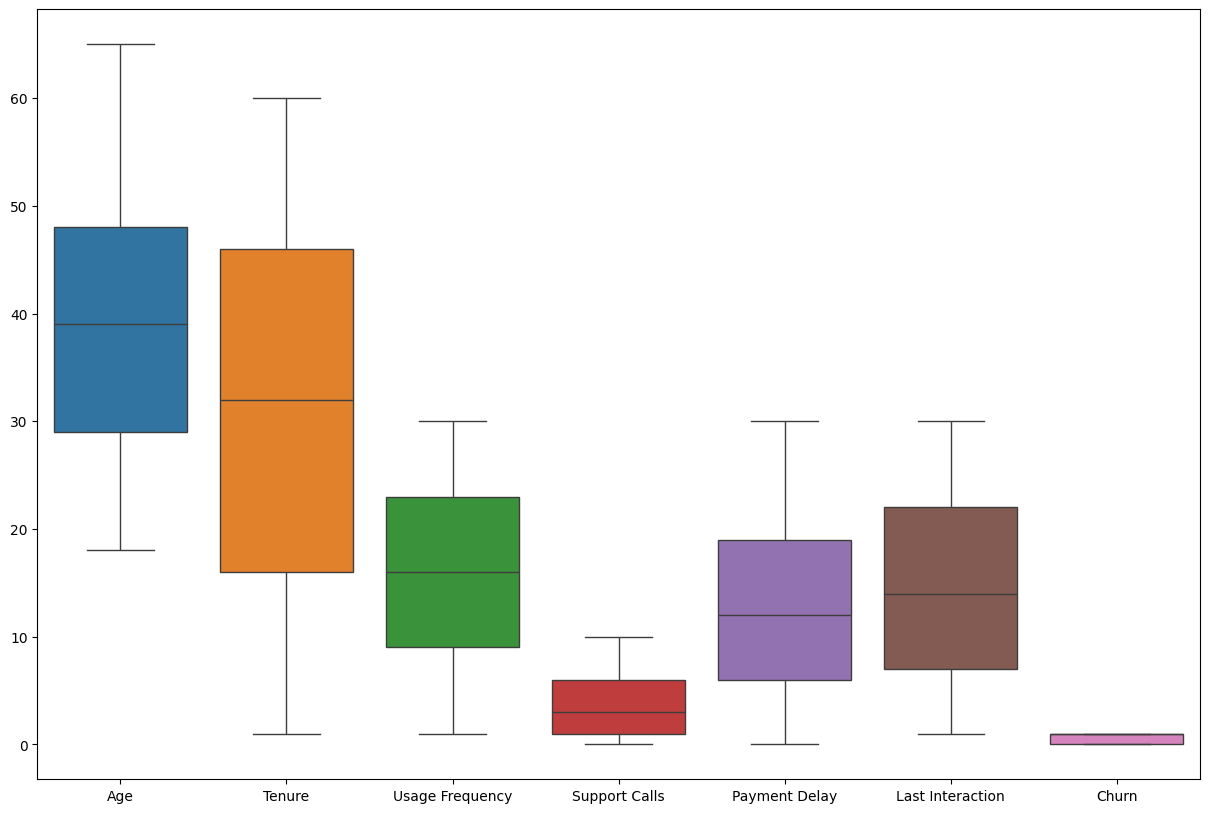

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot( df_train.drop("Total Spend",axis=1) )

## 범주형 데이터 확인 - 라벨인코딩

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_train.select_dtypes(include="object").columns:
  df_train[col] = le.fit_transform(df_train[col])
  df_test[col] = le.fit_transform(df_test[col])

In [59]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


### 중요!!

- 스케일링의 필요성
  - 베깅모델 : 트리기반이므로 영향을 받지 않는다
  - 부스팅모델 : 트리기반이나 XGBoost와 LightGBM은 내부적으로 최적화를수행 간혼 필요할수 있다
  - 반드시 필요한 모델
    - 선형모델(로지스틱회귀 ,SVM 등  sklearn.liner 시리즈)
    - 거리기반모델(KNN K-Means)
    - 신경망
  - 필요없는 모델도.. 성능을 높이기 위해서 시도해도 됨(간혹 시도함)

## 스케일링 없이 각각의 모델의 성능 비교

In [60]:
non_scaled_rf = RandomForestClassifier()
non_scaled_xgb = XGBClassifier()

In [64]:
# 데이터분리
x = df_train.drop("Churn",axis=1)
y = df_train["Churn"]

In [66]:
# 각 모델별 학습
non_scaled_rf.fit(x,y)

RandomForestClassifier()

In [67]:
non_scaled_xgb.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
# 각 모델별 평가
x_test = df_test.drop("Churn",axis=1)
y_test = df_test["Churn"]

y_pred = non_scaled_rf.predict(x_test)
print(classification_report(y_test,y_pred))

y_pred = non_scaled_xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

